In [18]:
import matplotlib.pyplot as plt;
import numpy as np;

<div dir="rtl">
سوال۱:

بخش اول:

سیگنال x متشکل از جمع ۴ دلتا است که ضریب همگی آنها ۱ است، با استفاده از np.arrange آنرا تولید میکنیم و چون مقادیر آن همگی ۱ هستند مقادیر ۱ را هم به آن ۴ نقطه اساین میکنیم. این سیگنال را رسم میکنیم.
حال تبدیل فوریه این سیگنال را حساب میکنیم و به همان روشی که در تمرین قبلی اندازه و فاز را حساب کردیم، اندازه و فاز این تبدیلات فوریه را حساب میکنیم و رسم میکنیم.
از آنجا که تعداد نمونه ها کم و برابر با ۴ هستند، شکل حاصل تابع ضربه را نشان میدهد اما شکل ایده‌آل ندارد، با افزایش سمپل ها میتوانیم آنرا به شکل دلتای ایده‌آل نزدیک تر کنیم.
</div>


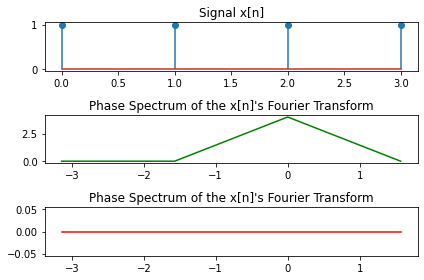

In [19]:
n = np.arange(0, 4, 1);
x = [1,1,1,1]
plt.subplot(3, 1, 1)
plt.stem(n, x, use_line_collection=True) 
plt.title("Signal x[n]")

fourier = np.fft.fft(x)
magnitude = np.fft.fftshift(np.abs(fourier))
phase = np.real(np.unwrap(np.angle(fourier)))
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier),d = 1/(2*np.pi)))
plt.subplot(3, 1, 2)
plt.plot(shifted_frequencies, magnitude, color ='green') 
plt.title("Phase Spectrum of the x[n]'s Fourier Transform")

plt.subplot(3, 1, 3)
plt.plot(shifted_frequencies, phase, color ='red') 
plt.title("Phase Spectrum of the x[n]'s Fourier Transform")

plt.tight_layout()
plt.show()

<div dir="rtl">
سوال۱:

بخش دوم:

من برای این خواسته در اینترنت سرچ کردم که چگونه این کار را کنم و در [این لینک](https://https://realpython.com/python-scipy-fft/) نوشته شده بود باید مقدار ورودی دوم تابع گیرنده فوریه را برابر با آن مقدار قرار داد، حال مانند قسمت قبل نمودار های فاز و اندازه را رسم میکنیم.

</div>

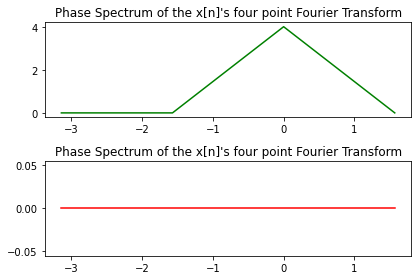

In [20]:
four_point_fourier_transform = np.fft.fft(x, 4)
magnitude = np.fft.fftshift(np.abs(four_point_fourier_transform))
phase = np.real(np.unwrap(np.angle(four_point_fourier_transform)))
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(four_point_fourier_transform),d = 1/(2*np.pi)))

plt.subplot(2, 1, 1)
plt.plot(shifted_frequencies, magnitude, color ='green') 
plt.title("Phase Spectrum of the x[n]'s four point Fourier Transform")

plt.subplot(2, 1, 2)
plt.plot(shifted_frequencies, phase, color ='red') 
plt.title("Phase Spectrum of the x[n]'s four point Fourier Transform")

plt.tight_layout()
plt.show()

<div dir="rtl">
سوال۱:

بخش سوم:

کافی است با یک حلقه برای مقادیر مختلف padding، همان کاری را که در قسمت قبل کردیم را انجام دهیم و نمودارها را رسم کنیم.

</div>

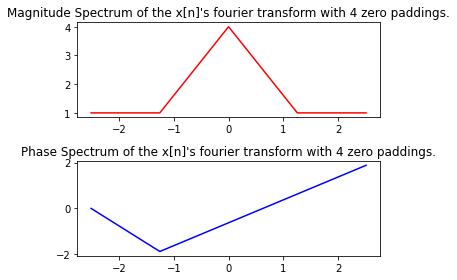

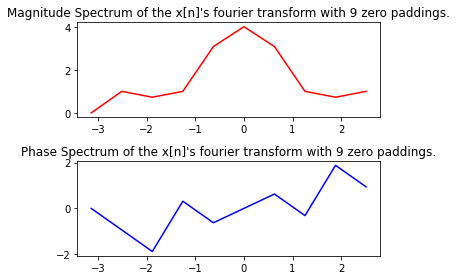

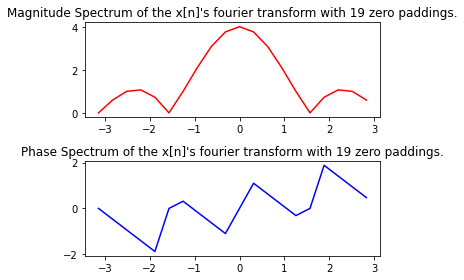

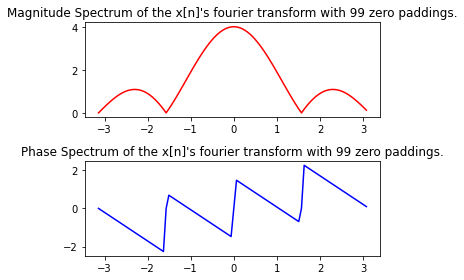

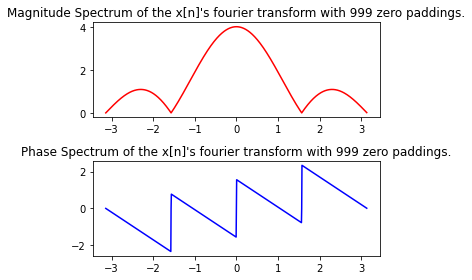

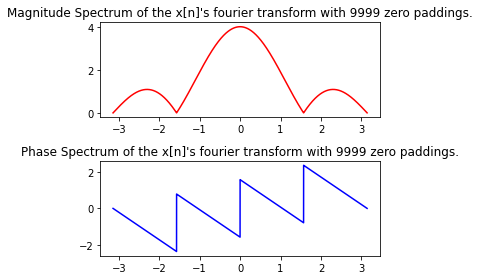

In [21]:
for i in (5, 10, 20, 100, 1000, 10000):
  fouier_transform = np.fft.fft(x, i)
  magnitude = np.abs(fouier_transform)
  fouier_transform[magnitude < 1e-6] = 0
  magnitude = np.fft.fftshift(magnitude)
  phase = np.unwrap(np.angle(fouier_transform))
  shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fouier_transform),d = 1/(2*np.pi)))
  plt.subplot(2, 1, 1)
  plt.plot(shifted_frequencies, magnitude, color ='red') 
  title = "Magnitude Spectrum of the x[n]'s fourier transform with "
  title += str(i-1)
  title += " zero paddings."
  plt.title(title)

  plt.subplot(2, 1, 2)
  plt.plot(shifted_frequencies, phase, color ='blue')
  title = "Phase Spectrum of the x[n]'s fourier transform with "
  title += str(i-1)
  title += " zero paddings." 
  plt.title(title)

  plt.tight_layout()
  plt.show()

<div dir="rtl">
سوال ۲:

مانند سوال قبل عمل میکنیم با این تفاوت که برای smooth کردن از یک N شروع میکنیم و آنرا افزایش میدهیم، هرچه مقدار N بیشتر باشد، مقدار zero padding زیاد میشود و همانطور که در مثال قبل دیدیم نمودار ها smooth تر میشوند. به نظر می‌آید مقادیر ۶۴ و ۱۲۸ به بعد، نمودار های خوبی به ما داده‌اند.


</div>

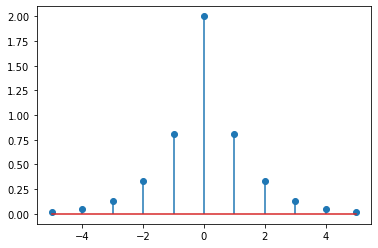

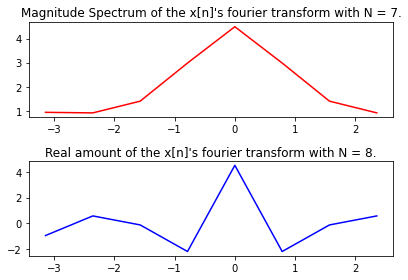

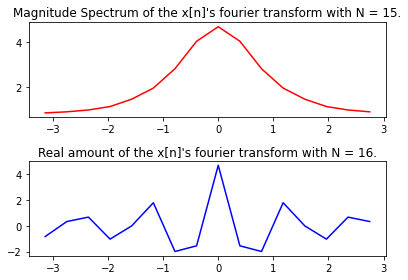

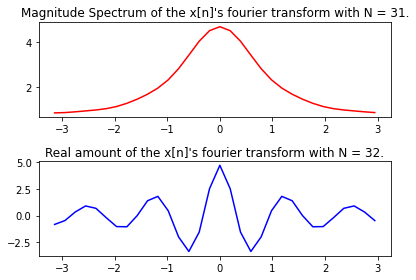

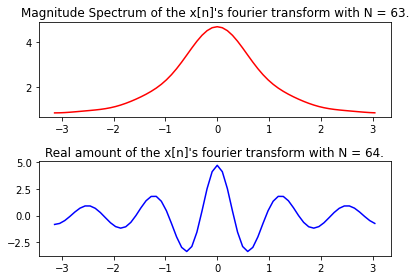

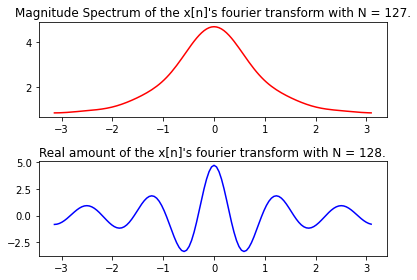

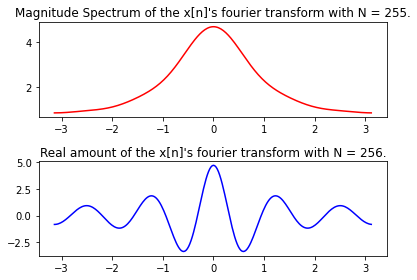

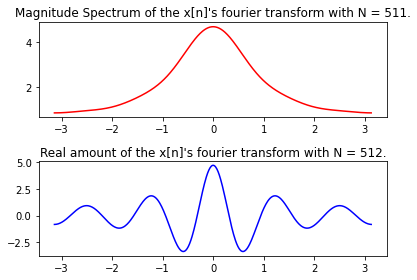

In [22]:
signal = []
for i in range(-5, 6):
  signal.append(2 * np.exp(-0.9 * np.abs(i)))
plt.stem(range(-5, 6), signal, use_line_collection=True)
plt.show()

for i in (8, 16, 32, 64, 128, 256, 512):
  n = np.arange(-i, i + 1, 1)
  fourier_transform = np.fft.fft(signal, i)
  magnitude = np.abs(fourier_transform)
  shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/(2*np.pi)))
  fourier_transform[magnitude < 1e-6] = 0
  magnitude = np.fft.fftshift(magnitude)
  real_part_of_fourier_transform = np.real(np.fft.fftshift(fourier_transform))

  plt.subplot(2, 1, 1)
  plt.plot(shifted_frequencies, magnitude, color ='red') 
  title = "Magnitude Spectrum of the x[n]'s fourier transform with "
  title += "N = "
  title += str(i-1) + "."
  plt.title(title)

  plt.subplot(2, 1, 2)
  plt.plot(shifted_frequencies, real_part_of_fourier_transform, color ='blue')
  title = "Real amount of the x[n]'s fourier transform with "
  title += "N = "
  title += str(i) + "." 
  plt.title(title)
  
  plt.tight_layout()
  plt.show()

<div dir="rtl">
سوال ۳:

با توجه به چیزی که درقسمت قبل دیدیم، اینجا هم از همان مقادیر ۱۲۸ یا حتی ۲۵۶ استفاده میکنیم و نمودار ها را میکشیم و اگر به اندازه کافی smooth نبودند، مقدار N را افزایش میدهیم. 
البته در انتها بخاطر اینکه به اندازه کافی smooth نبودند مقدار N را به ۱۰۲۴ افزایش دادم.

سیگنال اول:


</div>

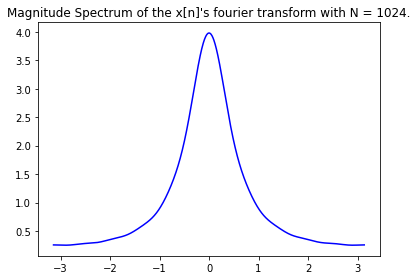

In [23]:
signal = []
N = 1024
for n in range(-10, 11):
  signal.append(np.power(0.6, np.abs(n)))
plt.subplot(1, 1, 1)
fourier_transform = np.fft.fft(signal, N)
magnitude = np.fft.fftshift(np.abs(fourier_transform))
title = "Magnitude Spectrum of the x[n]'s fourier transform with "
title += "N = "
title += str(N) + "."
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/(2*np.pi)))

plt.plot(shifted_frequencies, magnitude, color ='blue') 
plt.title(title)

plt.tight_layout()
plt.show()

<div dir="rtl">
سوال ۳:

سیگنال دوم:


</div>

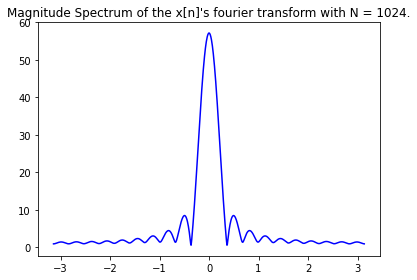

In [24]:
signal = []
N = 1024
for n in range(0, 21):
  signal.append(n * np.power(0.9, n))
plt.subplot(1, 1, 1)
fourier_transform = np.fft.fft(signal, N)
magnitude = np.fft.fftshift(np.abs(fourier_transform))
title = "Magnitude Spectrum of the x[n]'s fourier transform with "
title += "N = "
title += str(N) + "."
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/(2*np.pi)))

plt.plot(shifted_frequencies, magnitude, color ='blue') 
plt.title(title)

plt.tight_layout()
plt.show()

<div dir="rtl">
سوال ۳:

سیگنال سوم:


</div>

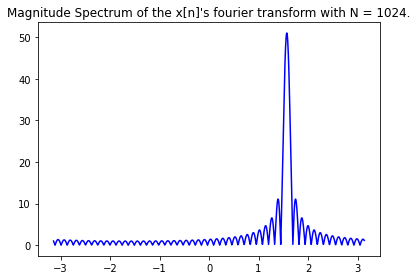

In [25]:
signal = []
N = 1024
for n in range(0, 51):
  signal.append(complex(np.cos(0.5 * np.pi * n), np.sin(0.5 * np.pi * n)))
plt.subplot(1, 1, 1)
fourier_transform = np.fft.fft(signal, N)
magnitude = np.fft.fftshift(np.abs(fourier_transform))
title = "Magnitude Spectrum of the x[n]'s fourier transform with "
title += "N = "
title += str(N) + "."
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/(2*np.pi)))
plt.plot(shifted_frequencies, magnitude, color ='blue') 
plt.title(title)

plt.tight_layout()
plt.show()


<div dir="rtl">
سوال ۳:

سیگنال چهارم:


</div>

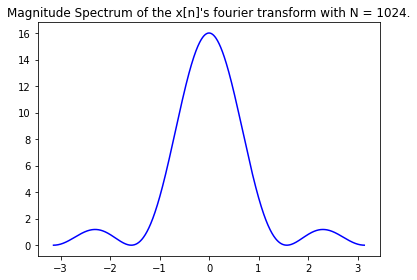

In [26]:
signal = [1,2,3,4,3,2,1]

fourier_transform = np.fft.fft(signal, N)
plt.subplot(1, 1, 1)
magnitude = np.fft.fftshift(np.abs(fourier_transform))
title = "Magnitude Spectrum of the x[n]'s fourier transform with "
title += "N = "
title += str(N) + "."
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/(2*np.pi)))
plt.plot(shifted_frequencies, magnitude, color ='blue') 
plt.title(title)

plt.tight_layout()
plt.show()


<div dir="rtl">
سوال ۳:

سیگنال پنجم:


</div>

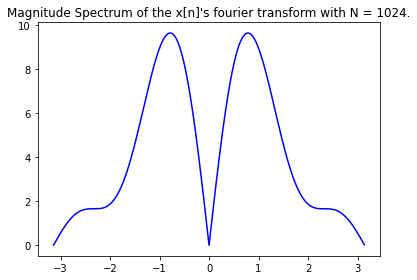

In [27]:
signal = [-1, -2, -3, 0, 3, 2, 1]

fourier_transform = np.fft.fft(signal, N)
plt.subplot(1, 1, 1)
magnitude = np.fft.fftshift(np.abs(fourier_transform))
title = "Magnitude Spectrum of the x[n]'s fourier transform with "
title += "N = "
title += str(N) + "."
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),d = 1/(2*np.pi)))
plt.plot(shifted_frequencies, magnitude, color ='blue') 
plt.title(title)

plt.tight_layout()
plt.show()

<div dir="rtl">
سوال ۴:

میدانیم پاسخ فرکانسی سیگنال به فرم
$$
x[n] = \alpha^n
$$
برای n های از ۰ تا k به فرم
$$
\sum_{n=0}^{k}(\alpha)^n(cos\omega n) + jsin(\omega n))
$$
است، حال اگر آلفا را برابر ۰.۹ قرار دهیم و k را برابر با ۶ مقدار real این عبارت با عبارت صورت سوال برابر میشود، حال این فرضیه را چک میکنیم:


</div>


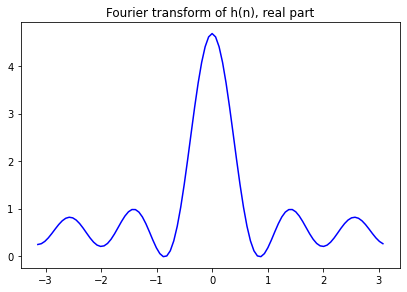

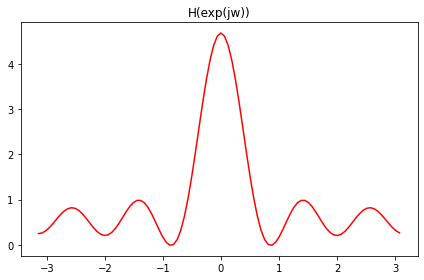

In [29]:
signal = []
for i in range(0, 6):
  signal.append(0.9**i)
plt.subplot(1, 1, 1)
fourier_transform = np.fft.fftshift(np.fft.fft(signal,100))
magnitude = np.real(fourier_transform)
plt.tight_layout()
shifted_frequencies = np.fft.fftshift(np.fft.fftfreq(len(fourier_transform),1/(2*np.pi)))
plt.plot(shifted_frequencies, magnitude, color ='blue') 
plt.title("Fourier transform of h(n), real part")
plt.show()

real_H_exp_jw = np.full(len(shifted_frequencies),0) # This is the sigma that is in problems passage.
plt.subplot(1, 1, 1)
for i in range(6):
    real_H_exp_jw = real_H_exp_jw + 0.9**i * np.cos(shifted_frequencies * i)
plt.plot(shifted_frequencies, real_H_exp_jw, color ='red') 
plt.title("H(exp(jw))")

plt.tight_layout()
plt.show()

<div dir="rtl">
همانطور که دیده میشود، فرضیه من درست به نظر میرسد و نمودار ها مشابه‌اند.

</div>
